# Decision Tree Model

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing the Dataset

In [2]:
dataset = pd.read_csv('./dataset/clean_iris.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Creating Feature and Label Arrays

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(len(X))
print(len(y))

150
150


## Encoding the Dependent Variable (Species)

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [6]:
class_mapping = {index: label for index, label in enumerate(encoder.classes_)}
print("Class mapping:", class_mapping)

Class mapping: {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


## Splitting the Dataset into Training and Test Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
print((len(X_train), len(y_train)), (len(X_test), len(y_test)))

(112, 112) (38, 38)


## Feature Scaling

In [9]:
scaler = StandardScaler() # StandardScaler instance
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the Decision Tree Model on the Training Set

In [10]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Evaluating the Model

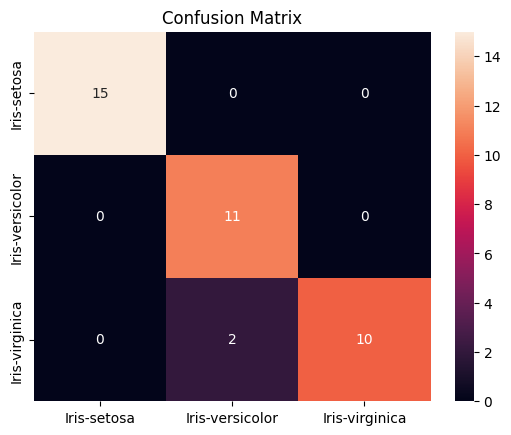

In [11]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # Tick labels for the confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, classifier.predict(X_test)), annot=True, xticklabels=labels, yticklabels=labels)
plt.show()

In [12]:
# Evaluating the accuracy of the model
print('Accuracy: {}'.format(accuracy_score(y_test, classifier.predict(X_test))))

Accuracy: 0.9473684210526315


In [13]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.85      1.00      0.92        11
           2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



In [14]:
# Defining scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro',
    'roc_auc': 'roc_auc_ovr'  # One-vs-rest ROC AUC for multi-class
}

# Performing cross-validation
cv_results = cross_validate(classifier, X_test, y_test, cv=10, scoring=scoring)

# Outputing average scores across folds
for metric in scoring:
    print(f'{metric}: {cv_results["test_" + metric].mean():.2f} (± {cv_results["test_" + metric].std():.2f})')

accuracy: 0.97 (± 0.07)
precision: 0.95 (± 0.15)
recall: 0.97 (± 0.10)
f1: 0.96 (± 0.13)
roc_auc: 0.98 (± 0.07)


c:\Users\Deju\anaconda3\envs\devspace\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
